Выгрузим данные по первому проекту с excel. Дадим нужные форматы каждому столбцу, выделим данные, которые нам нужны

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("file_for_step5.csv")

data_project = df[:5]

data_project = data_project[['Создано', 'PI (План)','PI (Факт)', 'End date']]
data_project = data_project.rename(columns={'Создано': 'Begin', 'PI (План)': 'TPM', 'PI (Факт)': 'TSM', 
                                           'End date': 'End'})

data_project['Begin'] = data_project['Begin'].str.slice(stop=10)

s = pd.Series(data_project['End'])
date = pd.to_datetime(s, format='%d,%m,%Y')
data_project['End'] = date

s1 = pd.Series(data_project['Begin'])
date1 = pd.to_datetime(s1, format='%d,%m,%Y')
data_project['Begin'] = date1

data_project = data_project.sort_values(by = "End")

## Тестируем вторую формулу

$$S = \sum_{i=1}^{MS}|TPM-TSM|^{sgn(TSM-TPM)}\times Sh_i$$

In [2]:
diff = data_project['TPM'].astype(float) - data_project['TSM'].astype(float)
delta = (data_project['End'][0] - data_project['Begin'][0]).days
duration = (data_project['End'][4] - data_project['Begin'][0]).days

data_project['Estimate'] = abs(diff) ** (np.sign(diff)) * ((delta) / (duration))

data_project

,Begin,TPM,TSM,End,Estimate
3,2021-12-22,2.4,4.7,2021-12-23,0.387753
2,2021-12-22,97.20,231,2022-06-27,0.006665
0,2021-12-22,264.6,103,2023-01-30,144.120088
1,2021-12-22,50.1,40,2023-02-28,9.007506
4,2021-12-22,114.4,150,2023-03-20,0.025051


In [3]:
data_project = data_project.reset_index(drop=True)

data_project

,Begin,TPM,TSM,End,Estimate
0,2021-12-22,2.4,4.7,2021-12-23,0.387753
1,2021-12-22,97.20,231,2022-06-27,0.006665
2,2021-12-22,264.6,103,2023-01-30,144.120088
3,2021-12-22,50.1,40,2023-02-28,9.007506
4,2021-12-22,114.4,150,2023-03-20,0.025051


In [4]:
data_project["Коэффициент"] = [sum([pd.to_numeric(data_project["Estimate"][i]) for i in range(j+1)]) / (j + 1) for j in range(5)]

data_project

,Begin,TPM,TSM,End,Estimate,Коэффициент
0,2021-12-22,2.4,4.7,2021-12-23,0.387753,0.387753
1,2021-12-22,97.20,231,2022-06-27,0.006665,0.197209
2,2021-12-22,264.6,103,2023-01-30,144.120088,48.171502
3,2021-12-22,50.1,40,2023-02-28,9.007506,38.380503
4,2021-12-22,114.4,150,2023-03-20,0.025051,30.709413


In [5]:
data_project["План общий"] = [sum([pd.to_numeric(data_project["TPM"][i]) for i in range(j+1)]) for j in range(5)]
data_project["Факт общий"] = [sum([pd.to_numeric(data_project["TSM"][i]) for i in range(j+1)]) for j in range(5)]

data_project

,Begin,TPM,TSM,End,Estimate,Коэффициент,План общий,Факт общий
0,2021-12-22,2.4,4.7,2021-12-23,0.387753,0.387753,2.4,4.7
1,2021-12-22,97.20,231,2022-06-27,0.006665,0.197209,99.6,235.7
2,2021-12-22,264.6,103,2023-01-30,144.120088,48.171502,364.2,338.7
3,2021-12-22,50.1,40,2023-02-28,9.007506,38.380503,414.3,378.7
4,2021-12-22,114.4,150,2023-03-20,0.025051,30.709413,528.7,528.7


In [6]:
S =  sum([pd.to_numeric(data_project['TPM'][j]) for j in range(1, 5)]) * pd.to_numeric(data_project['Коэффициент'][0]) + pd.to_numeric(data_project["TSM"][0])
data_project['Estimate_hours'] = S

for i in range(1, 5):
    print(sum([pd.to_numeric(data_project['TSM'][j]) for j in range(0, i + 1)]))
    data_project['Estimate_hours'][i] = sum([pd.to_numeric(data_project['TSM'][j]) for j in range(0, i + 1)]) + sum([pd.to_numeric(data_project['TPM'][j]) for j in range(i + 1, 5)]) * pd.to_numeric(data_project['Коэффициент'][i])

data_project


235.7
338.7
378.7
528.7


,Begin,TPM,TSM,End,Estimate,Коэффициент,План общий,Факт общий,Estimate_hours
0,2021-12-22,2.4,4.7,2021-12-23,0.387753,0.387753,2.4,4.7,208.774479
1,2021-12-22,97.20,231,2022-06-27,0.006665,0.197209,99.6,235.7,320.322501
2,2021-12-22,264.6,103,2023-01-30,144.120088,48.171502,364.2,338.7,8262.912126
3,2021-12-22,50.1,40,2023-02-28,9.007506,38.380503,414.3,378.7,4769.429554
4,2021-12-22,114.4,150,2023-03-20,0.025051,30.709413,528.7,528.7,528.700000


In [7]:
data_project = data_project.drop(columns=["Begin", "End", "Estimate"])

data_project

,TPM,TSM,Коэффициент,План общий,Факт общий,Estimate_hours
0,2.4,4.7,0.387753,2.4,4.7,208.774479
1,97.20,231,0.197209,99.6,235.7,320.322501
2,264.6,103,48.171502,364.2,338.7,8262.912126
3,50.1,40,38.380503,414.3,378.7,4769.429554
4,114.4,150,30.709413,528.7,528.7,528.700000


In [8]:
data_project = data_project.rename(columns={"TPM" : "План", "TSM" : "Факт", "Estimate_hours" : "Предсказание на проект"})

data_project

,План,Факт,Коэффициент,План общий,Факт общий,Предсказание на проект
0,2.4,4.7,0.387753,2.4,4.7,208.774479
1,97.20,231,0.197209,99.6,235.7,320.322501
2,264.6,103,48.171502,364.2,338.7,8262.912126
3,50.1,40,38.380503,414.3,378.7,4769.429554
4,114.4,150,30.709413,528.7,528.7,528.700000


In [9]:
data_project["Название этапа"] = ["Инициация", "Анализ", "Реализация", "Внедрение", "Завершение"]

data_project = data_project[["Название этапа", "Факт", "План", "Факт общий", "План общий", "Коэффициент", "Предсказание на проект"]]

data_project

,Название этапа,Факт,План,Факт общий,План общий,Коэффициент,Предсказание на проект
0,Инициация,4.7,2.4,4.7,2.4,0.387753,208.774479
1,Анализ,231,97.20,235.7,99.6,0.197209,320.322501
2,Реализация,103,264.6,338.7,364.2,48.171502,8262.912126
3,Внедрение,40,50.1,378.7,414.3,38.380503,4769.429554
4,Завершение,150,114.4,528.7,528.7,30.709413,528.700000


Наблюдаем закономерности, когда мы отстаем или нагоняем график, но пока нельзя сделать вывод, относительно какого параметра считать прогноз хорошим или плохим. Для этого нужно еще в дальнейшем улучшать формулу. 

Пока оставим и посмотрим на другие разультаты

## Перейдем к первой формуле

$$S = \frac{1}{MS}\sum_{i=1}^{MS} PT \times \frac{TSM_{i}}{TPM_{i}}$$

$$S = \frac{1}{MS}\sum_{i=1}^{MS} \frac{TSM_{i}}{TPM_{i}}$$

In [10]:
df = pd.read_csv("file_for_step5.csv")

data_project = df[:6]

data_project = data_project[['PI (План)','PI (Факт)', 'Baseline PI план с учетом рисков']]
data_project = data_project.rename(columns={'PI (План)': 'TPM', 'PI (Факт)': 'TSM', 
                                           'Baseline PI план с учетом рисков': 'PI_plan'})

data_project = data_project.reindex([3, 2, 0, 1, 4, 5])
data_project = data_project.reset_index(drop=True)
data_project


,TPM,TSM,PI_plan
0,2.4,4.7,2.4
1,97.20,231,99.6
2,264.6,103,238.6
3,50.1,40,50.1
4,114.4,150,18.4
5,528.7,\n,409.1


In [11]:
S = pd.to_numeric(data_project['TSM'][0]) / pd.to_numeric(data_project['TPM'][0])
data_project['Estimate_coef'] = S
for i in range(1, 5):
    S += pd.to_numeric(data_project['TSM'][i]) / pd.to_numeric(data_project['TPM'][i])
    data_project['Estimate_coef'][i] = S
    data_project['Estimate_coef'][i] /= i + 1

amount = 5
S = pd.to_numeric(data_project['TPM'][5]) * pd.to_numeric(data_project['Estimate_coef'][0])
data_project['Estimate_hours'] = S
for i in range(1, 5):
    data_project['Estimate_hours'][i] = sum([pd.to_numeric(data_project['TSM'][j]) for j in range(0, i + 1)]) + sum([pd.to_numeric(data_project['TPM'][j]) for j in range(i + 1, 5)]) * pd.to_numeric(data_project['Estimate_coef'][i])
data_project


,TPM,TSM,PI_plan,Estimate_coef,Estimate_hours
0,2.4,4.7,2.4,1.958333,1035.370833
1,97.20,231,99.6,2.167438,1165.747762
2,264.6,103,238.6,1.574714,597.740528
3,50.1,40,50.1,1.380637,536.644831
4,114.4,150,18.4,1.366747,528.700000
5,528.7,\n,409.1,1.958333,1035.370833


In [12]:
data_project = data_project.rename(columns={"TPM" : "План", "TSM" : "Факт", "Estimate_coef" : "Коэффициент", "Estimate_hours" : "Предсказание на проект"})
data_project = data_project.drop("PI_plan", axis=1)


In [14]:
data_project["План общий"] = [sum([pd.to_numeric(data_project["План"][i]) for i in range(j+1)]) for j in range(6)]
data_project["Факт общий"] = [sum([pd.to_numeric(data_project["План"][i]) for i in range(j+1)]) for j in range(5)] + [0]

data_project


,План,Факт,Коэффициент,Предсказание на проект,План общий,Факт общий
0,2.4,4.7,1.958333,1035.370833,2.4,2.4
1,97.20,231,2.167438,1165.747762,99.6,99.6
2,264.6,103,1.574714,597.740528,364.2,364.2
3,50.1,40,1.380637,536.644831,414.3,414.3
4,114.4,150,1.366747,528.700000,528.7,528.7
5,528.7,\n,1.958333,1035.370833,1057.4,0.0


In [15]:
data_project = data_project.drop(5)

data_project


,План,Факт,Коэффициент,Предсказание на проект,План общий,Факт общий
0,2.4,4.7,1.958333,1035.370833,2.4,2.4
1,97.20,231,2.167438,1165.747762,99.6,99.6
2,264.6,103,1.574714,597.740528,364.2,364.2
3,50.1,40,1.380637,536.644831,414.3,414.3
4,114.4,150,1.366747,528.700000,528.7,528.7


In [16]:
data_project["Название этапа"] = ["Инициация", "Анализ", "Реализация", "Внедрение", "Завершение"]
data_project = data_project[["Название этапа", "Факт", "План", "Факт общий", "План общий", "Коэффициент", "Предсказание на проект"]]

data_project

,Название этапа,Факт,План,Факт общий,План общий,Коэффициент,Предсказание на проект
0,Инициация,4.7,2.4,2.4,2.4,1.958333,1035.370833
1,Анализ,231,97.20,99.6,99.6,2.167438,1165.747762
2,Реализация,103,264.6,364.2,364.2,1.574714,597.740528
3,Внедрение,40,50.1,414.3,414.3,1.380637,536.644831
4,Завершение,150,114.4,528.7,528.7,1.366747,528.700000


In [17]:
data_project["Предсказание на проект"][4] = None

data_project

,Название этапа,Факт,План,Факт общий,План общий,Коэффициент,Предсказание на проект
0,Инициация,4.7,2.4,2.4,2.4,1.958333,1035.370833
1,Анализ,231,97.20,99.6,99.6,2.167438,1165.747762
2,Реализация,103,264.6,364.2,364.2,1.574714,597.740528
3,Внедрение,40,50.1,414.3,414.3,1.380637,536.644831
4,Завершение,150,114.4,528.7,528.7,1.366747,NaN



Мы получили две оценки: коэфициент и часы. Коэф < 1 соответствует тому, что мы опережаем график. Иначе - отстаем.

Построим графики прогноза на каждом майлстоуне

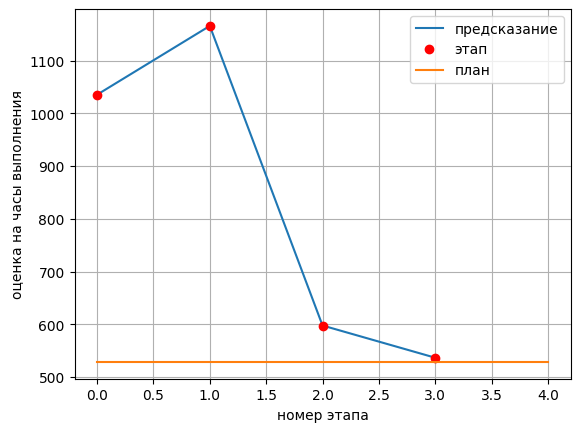

In [21]:
plt.plot([0, 1, 2, 3, 4], data_project['Предсказание на проект'][:5], label='предсказание')
plt.plot([0, 1, 2, 3, 4], data_project['Предсказание на проект'][:5], 'ro', label='этап')


plt.grid()
plt.xlabel('номер этапа')
plt.ylabel('оценка на часы выполнения')
plt.plot([0, 4], [float(data_project['План общий'][4]), float(data_project['План общий'][4])], label='план')
plt.legend()
plt.show()


Заметим, что формула работает отлично. Действительно, на последнем майлстоуне мы дичайше отстали от графика. Однако в реальности указано, что выполнено все ровно в срок. Есть предположение, что это просто человеческий фактор. В реальности в срок никто не успевает, но списывает часы так, как будто все в норме 

## Тест формулы 

Теперь давайте изменим колонку TSM, так, чтобы мы шли строго по плану и посмотрим на результат нашей формулы

In [92]:
df = pd.read_csv("file_for_step5.csv")

data_project_first = df[:6]

data_project_first = data_project_first[['PI (План)','PI (Факт)', 'Baseline PI план с учетом рисков']]
data_project_first = data_project_first.rename(columns={'PI (План)': 'TPM', 'PI (Факт)': 'TSM', 
                                           'Baseline PI план с учетом рисков': 'PI_plan'})

data_project_first = data_project_first.reindex([3, 2, 0, 1, 4, 5])
data_project_first = data_project_first.reset_index(drop=True)
data_project_first


,TPM,TSM,PI_plan
0,2.4,4.7,2.4
1,97.20,231,99.6
2,264.6,103,238.6
3,50.1,40,50.1
4,114.4,150,18.4
5,528.7,\n,409.1


In [94]:
S = pd.to_numeric(data_project_first['TSM'][0]) / pd.to_numeric(data_project_first['TPM'][0])
data_project_first['Estimate_coef'] = S

data_project_first["TSM"] = data_project_first["TPM"]

for i in range(1, 5):
    S += pd.to_numeric(data_project_first['TSM'][i]) / pd.to_numeric(data_project_first['TPM'][i])
    data_project_first['Estimate_coef'][i] = S
    data_project_first['Estimate_coef'][i] /= i + 1

amount = 5
S = pd.to_numeric(data_project_first['TPM'][5]) * pd.to_numeric(data_project_first['Estimate_coef'][0])
data_project_first['Estimate_hours'] = S
for i in range(1, 5):
    data_project_first['Estimate_hours'][i] = sum([pd.to_numeric(data_project_first['TSM'][j]) for j in range(0, i + 1)]) + sum([pd.to_numeric(data_project_first['TPM'][j]) for j in range(i + 1, 5)]) * pd.to_numeric(data_project_first['Estimate_coef'][i])
data_project_first


,TPM,TSM,PI_plan,Estimate_coef,Estimate_hours
0,2.4,2.4,2.4,1.0,528.7
1,97.20,97.20,99.6,1.0,528.7
2,264.6,264.6,238.6,1.0,528.7
3,50.1,50.1,50.1,1.0,528.7
4,114.4,114.4,18.4,1.0,528.7
5,528.7,528.7,409.1,1.0,528.7


In [95]:
data_project_first = data_project_first.rename(columns={"TPM" : "План", "TSM" : "Факт", "Estimate_coef" : "Коэффициент", "Estimate_hours" : "Предсказание на проект"})
data_project_first = data_project_first.drop("PI_plan", axis=1)

data_project_first

,План,Факт,Коэффициент,Предсказание на проект
0,2.4,2.4,1.0,528.7
1,97.20,97.20,1.0,528.7
2,264.6,264.6,1.0,528.7
3,50.1,50.1,1.0,528.7
4,114.4,114.4,1.0,528.7
5,528.7,528.7,1.0,528.7


In [96]:
data_project_first["План общий"] = [sum([pd.to_numeric(data_project_first["План"][i]) for i in range(j+1)]) for j in range(6)]
data_project_first["Факт общий"] = [sum([pd.to_numeric(data_project_first["Факт"][i]) for i in range(j+1)]) for j in range(5)] + [0]

data_project_first


,План,Факт,Коэффициент,Предсказание на проект,План общий,Факт общий
0,2.4,2.4,1.0,528.7,2.4,2.4
1,97.20,97.20,1.0,528.7,99.6,99.6
2,264.6,264.6,1.0,528.7,364.2,364.2
3,50.1,50.1,1.0,528.7,414.3,414.3
4,114.4,114.4,1.0,528.7,528.7,528.7
5,528.7,528.7,1.0,528.7,1057.4,0.0


In [97]:
data_project_first = data_project_first.drop(5)

data_project_first


,План,Факт,Коэффициент,Предсказание на проект,План общий,Факт общий
0,2.4,2.4,1.0,528.7,2.4,2.4
1,97.20,97.20,1.0,528.7,99.6,99.6
2,264.6,264.6,1.0,528.7,364.2,364.2
3,50.1,50.1,1.0,528.7,414.3,414.3
4,114.4,114.4,1.0,528.7,528.7,528.7


In [98]:
data_project_first["Название этапа"] = ["Инициация", "Анализ", "Реализация", "Внедрение", "Завершение"]
data_project_first = data_project_first[["Название этапа", "Факт", "План", "Факт общий", "План общий", "Коэффициент", "Предсказание на проект"]]

data_project_first

,Название этапа,Факт,План,Факт общий,План общий,Коэффициент,Предсказание на проект
0,Инициация,2.4,2.4,2.4,2.4,1.0,528.7
1,Анализ,97.20,97.20,99.6,99.6,1.0,528.7
2,Реализация,264.6,264.6,364.2,364.2,1.0,528.7
3,Внедрение,50.1,50.1,414.3,414.3,1.0,528.7
4,Завершение,114.4,114.4,528.7,528.7,1.0,528.7


In [99]:
data_project_first["Предсказание на проект"][4] = None

data_project_first

,Название этапа,Факт,План,Факт общий,План общий,Коэффициент,Предсказание на проект
0,Инициация,2.4,2.4,2.4,2.4,1.0,528.7
1,Анализ,97.20,97.20,99.6,99.6,1.0,528.7
2,Реализация,264.6,264.6,364.2,364.2,1.0,528.7
3,Внедрение,50.1,50.1,414.3,414.3,1.0,528.7
4,Завершение,114.4,114.4,528.7,528.7,1.0,NaN


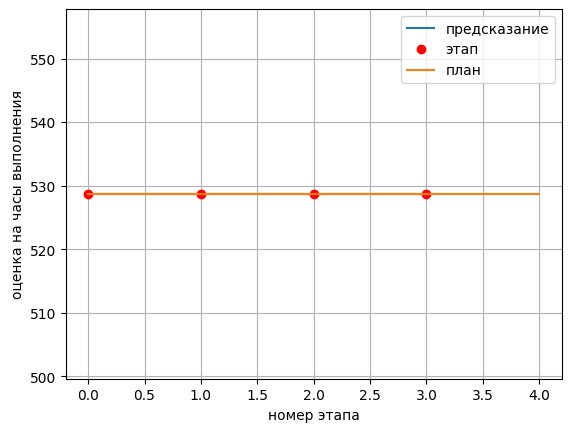

In [100]:
plt.plot([0, 1, 2, 3, 4], data_project_first['Предсказание на проект'][:5], label='предсказание')
plt.plot([0, 1, 2, 3, 4], data_project_first['Предсказание на проект'][:5], 'ro', label='этап')


plt.grid()
plt.xlabel('номер этапа')
plt.ylabel('оценка на часы выполнения')
plt.plot([0, 4], [float(data_project_first['План общий'][4]), float(data_project_first['План общий'][4])], label='план')
plt.legend()
plt.show()


Видим, что предсказание очень точное, мы идем ровно по графику

Сейчас прибавим 5 часов к фактически затраченному времени и посмотрим на результаты формулы

In [101]:
df = pd.read_csv("file_for_step5.csv")

data_project_second = df[:6]

data_project_second = data_project_second[['PI (План)','PI (Факт)', 'Baseline PI план с учетом рисков']]
data_project_second = data_project_second.rename(columns={'PI (План)': 'TPM', 'PI (Факт)': 'TSM', 
                                           'Baseline PI план с учетом рисков': 'PI_plan'})

data_project_second = data_project_second.reindex([3, 2, 0, 1, 4, 5])
data_project_second = data_project_second.reset_index(drop=True)
data_project_second


,TPM,TSM,PI_plan
0,2.4,4.7,2.4
1,97.20,231,99.6
2,264.6,103,238.6
3,50.1,40,50.1
4,114.4,150,18.4
5,528.7,\n,409.1


In [102]:
S = pd.to_numeric(data_project_second['TSM'][0]) / pd.to_numeric(data_project_second['TPM'][0])
data_project_second['Estimate_coef'] = S

data_project_second["TSM"] = data_project_second["TPM"]
data_project_second["TSM"] = data_project_second["TSM"].astype(float) + 5

for i in range(1, 5):
    S += pd.to_numeric(data_project_second['TSM'][i]) / pd.to_numeric(data_project_second['TPM'][i])
    data_project_second['Estimate_coef'][i] = S
    data_project_second['Estimate_coef'][i] /= i + 1

amount = 5
S = pd.to_numeric(data_project_second['TPM'][5]) * pd.to_numeric(data_project_second['Estimate_coef'][0])
data_project_second['Estimate_hours'] = S
for i in range(1, 5):
    data_project_second['Estimate_hours'][i] = sum([pd.to_numeric(data_project_second['TSM'][j]) for j in range(0, i + 1)]) + sum([pd.to_numeric(data_project_second['TPM'][j]) for j in range(i + 1, 5)]) * pd.to_numeric(data_project_second['Estimate_coef'][i])
data_project_second


,TPM,TSM,PI_plan,Estimate_coef,Estimate_hours
0,2.4,7.4,2.4,1.958333,1035.370833
1,97.20,102.2,99.6,1.504887,755.346939
2,264.6,269.6,238.6,1.342890,600.105411
3,50.1,55.1,50.1,1.282118,580.974257
4,114.4,119.4,18.4,1.234435,553.700000
5,528.7,533.7,409.1,1.958333,1035.370833


In [103]:
data_project_second = data_project_second.rename(columns={"TPM" : "План", "TSM" : "Факт", "Estimate_coef" : "Коэффициент", "Estimate_hours" : "Предсказание на проект"})
data_project_second = data_project_second.drop("PI_plan", axis=1)

data_project_second

,План,Факт,Коэффициент,Предсказание на проект
0,2.4,7.4,1.958333,1035.370833
1,97.20,102.2,1.504887,755.346939
2,264.6,269.6,1.342890,600.105411
3,50.1,55.1,1.282118,580.974257
4,114.4,119.4,1.234435,553.700000
5,528.7,533.7,1.958333,1035.370833


In [104]:
data_project_second["План общий"] = [sum([pd.to_numeric(data_project_second["План"][i]) for i in range(j+1)]) for j in range(6)]
data_project_second["Факт общий"] = [sum([pd.to_numeric(data_project_second["Факт"][i]) for i in range(j+1)]) for j in range(5)] + [0]

data_project_second


,План,Факт,Коэффициент,Предсказание на проект,План общий,Факт общий
0,2.4,7.4,1.958333,1035.370833,2.4,7.4
1,97.20,102.2,1.504887,755.346939,99.6,109.6
2,264.6,269.6,1.342890,600.105411,364.2,379.2
3,50.1,55.1,1.282118,580.974257,414.3,434.3
4,114.4,119.4,1.234435,553.700000,528.7,553.7
5,528.7,533.7,1.958333,1035.370833,1057.4,0.0


In [105]:
data_project_second = data_project_second.drop(5)

data_project_second


,План,Факт,Коэффициент,Предсказание на проект,План общий,Факт общий
0,2.4,7.4,1.958333,1035.370833,2.4,7.4
1,97.20,102.2,1.504887,755.346939,99.6,109.6
2,264.6,269.6,1.342890,600.105411,364.2,379.2
3,50.1,55.1,1.282118,580.974257,414.3,434.3
4,114.4,119.4,1.234435,553.700000,528.7,553.7


In [107]:
data_project_second["Название этапа"] = ["Инициация", "Анализ", "Реализация", "Внедрение", "Завершение"]
data_project_second = data_project_second[["Название этапа", "Факт", "План", "Факт общий", "План общий", "Коэффициент", "Предсказание на проект"]]

data_project_second

,Название этапа,Факт,План,Факт общий,План общий,Коэффициент,Предсказание на проект
0,Инициация,7.4,2.4,7.4,2.4,1.958333,1035.370833
1,Анализ,102.2,97.20,109.6,99.6,1.504887,755.346939
2,Реализация,269.6,264.6,379.2,364.2,1.342890,600.105411
3,Внедрение,55.1,50.1,434.3,414.3,1.282118,580.974257
4,Завершение,119.4,114.4,553.7,528.7,1.234435,553.700000


In [108]:
data_project_second["Предсказание на проект"][4] = None

data_project_second

,Название этапа,Факт,План,Факт общий,План общий,Коэффициент,Предсказание на проект
0,Инициация,7.4,2.4,7.4,2.4,1.958333,1035.370833
1,Анализ,102.2,97.20,109.6,99.6,1.504887,755.346939
2,Реализация,269.6,264.6,379.2,364.2,1.342890,600.105411
3,Внедрение,55.1,50.1,434.3,414.3,1.282118,580.974257
4,Завершение,119.4,114.4,553.7,528.7,1.234435,NaN


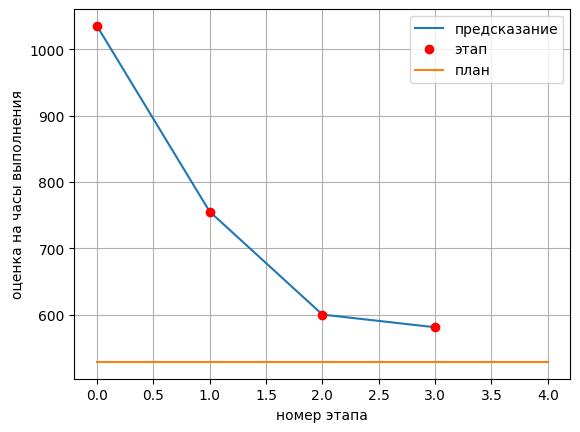

In [109]:
plt.plot([0, 1, 2, 3, 4], data_project_second['Предсказание на проект'][:5], label='предсказание')
plt.plot([0, 1, 2, 3, 4], data_project_second['Предсказание на проект'][:5], 'ro', label='этап')


plt.grid()
plt.xlabel('номер этапа')
plt.ylabel('оценка на часы выполнения')
plt.plot([0, 4], [float(data_project_second['План общий'][4]), float(data_project_second['План общий'][4])], label='план')
plt.legend()
plt.show()


<!-- Сначала мы отставали совсем чуть-чуть, а потом на одном этапе резко отстали, так как получили большое отношение из-за того, что время на milestone было не большое. Результат видим на графике -->

Мы можем видеть, что наше предсказание становится точнее с каждым последним этапом. В начале разрыв между предсказанием и фактом большой, так как инициация выполнялась в 3 раза дольше, чем планировалось. Далее мы введем коэффициенты для улучшения результата. Также в предсказании можно не учитывать инициацию.
